In [1]:
import sys
sys.path.append('../')

In [2]:
from sarpy.datasets import load_emnist
from sarpy.visualization import mosaic, hist_components
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sarpy.processing.noise import poisson_noise, gaussian_noise

In [3]:
import imageio
from IPython.display import Image

def animate_visualization(mosaic, number_of_frames, has_labels=True, duration=1):
    def create_gif(images_input, duration=1, output_file='data.gif'):
        images = []
        for i in images_input:
            images.append(i)
        imageio.mimsave(output_file, images, duration=duration)
    
    width, height = int(len(mosaic)/number_of_frames), len(mosaic[0])
    if has_labels:
        create_gif([mosaic.reshape(number_of_frames, width, height)[0]], duration, 'data1.gif')
        create_gif(mosaic.reshape(number_of_frames, width, height)[1:], duration, 'data2.gif')
        display(Image(filename="data1.gif"))
        display(Image(filename="data2.gif"))
    else:
        create_gif(mosaic.reshape(number_of_frames, width, height, duration, 'data.gif'))
        display(Image(filename="data.gif"))

In [55]:
data = fetch_olivetti_faces()
labels = data.target
images = data.images

In [56]:
images = images*255
#images = poisson_noise(images, peak=50)
images = gaussian_noise(images, var=20)
images = images.astype(np.uint8)


In [57]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [58]:
m = mosaic(images, labels, num_rows=5,
           classes=np.unique(labels)[:5],
           class_names=list(zip(np.unique(labels)[:5],
                                np.unique(labels)[:5].astype(str))))

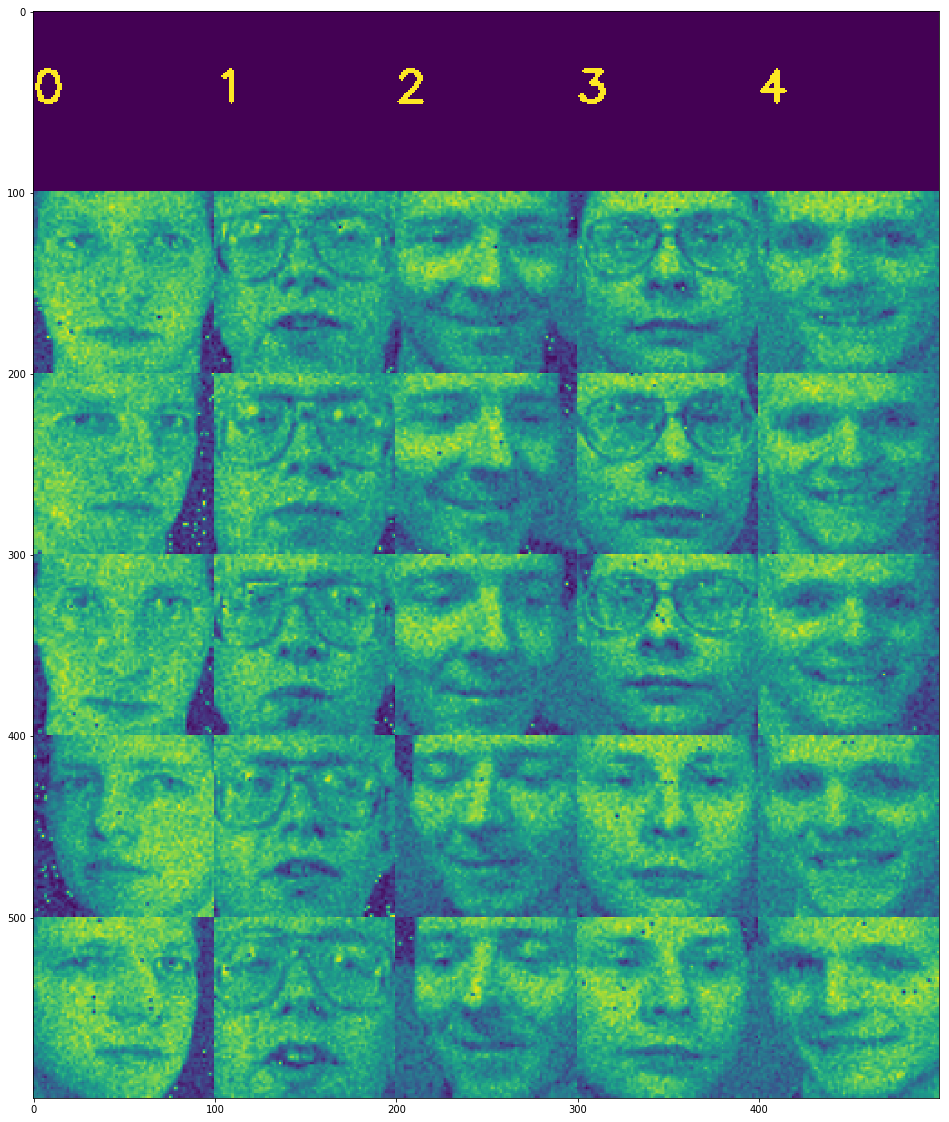

In [59]:
plt.figure(figsize=(20, 20))
plt.imshow(m)
plt.show()

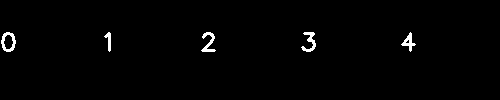

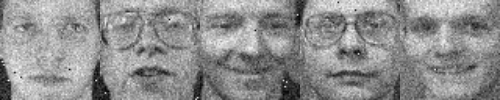

In [60]:
animate_visualization(m, 6)

In [67]:
train_imgs, train_labels, _, _, _, _, mapping, n_classes = load_emnist('letters')

reshape testing: 100%|██████████| 20800/20800 [00:00<00:00, 28734.34it/s]

Train size: 124800
Test size: 20800
Validation size: 0
# classes: 26


In [68]:
train_imgs.shape, train_labels.shape

((124800, 28, 28, 1), (124800, 1))

In [69]:
#train_imgs = poisson_noise(train_imgs, peak=50)
train_imgs = gaussian_noise(train_imgs, var=1)

In [70]:
m = mosaic(np.squeeze(train_imgs), train_labels, num_rows=5,
           classes=np.unique(train_labels)[:5],
           class_names=[(None, "A"), (None, "B"), 
                        (None, "C"), (None, "D"), (None, "E"),])

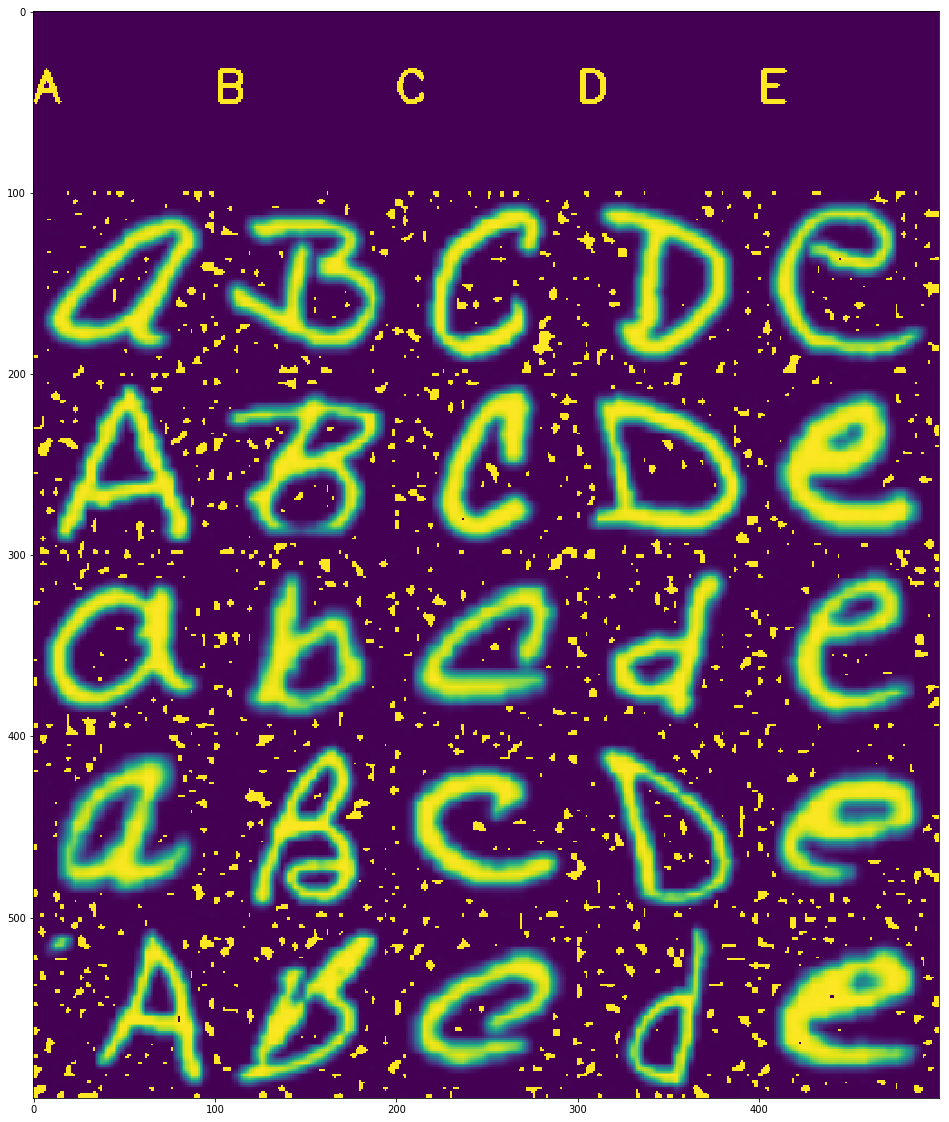

In [71]:
plt.figure(figsize=(20, 20))
plt.imshow(m)
plt.show()

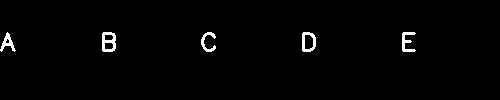

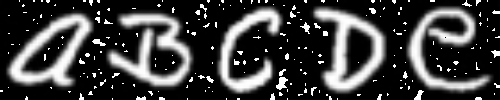

In [72]:
animate_visualization(m, 6)